# Import necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
IMG_SIZE = 256
BATCH_SIZE = 30

df = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '../Data/Datathon-Dataset',
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 3224 files belonging to 4 classes.


In [3]:
df_classes = list(df.class_names)
num_df_classes = len(df_classes)

df_classes

['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']

In [4]:
len(df)

108

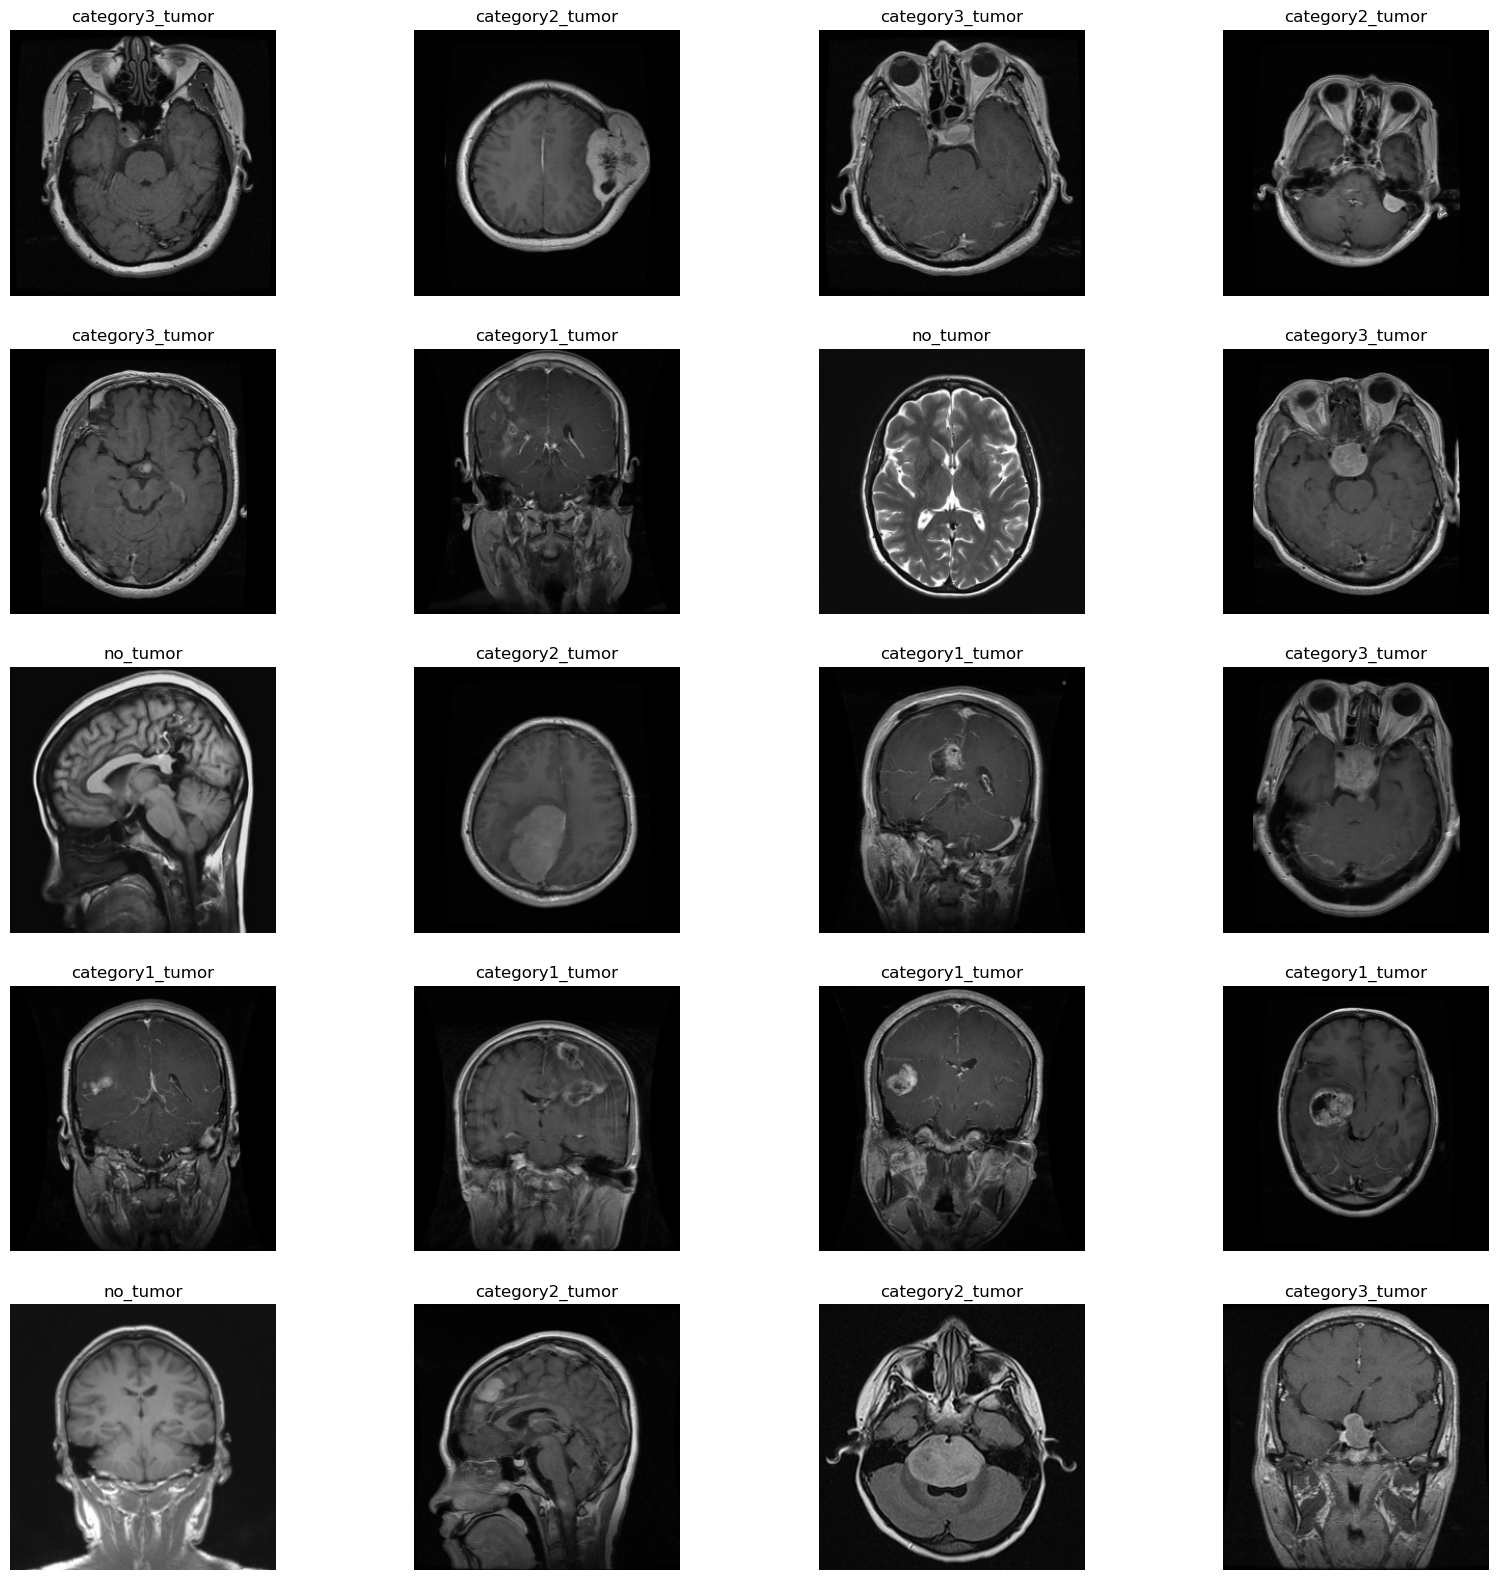

In [5]:
plt.figure(figsize=(20, 20))

for i, j in df.take(1):
   for k in range(20):
       ax = plt.subplot(5, 4, k + 1)
       plt.imshow(i[k].numpy().astype('uint8'))
       plt.title(df_classes[j[k]])
       plt.axis("off")

# Split Dataset

We split whole dataset in to 3 parts.
1. 80% to the training the model.
2. 10% to the validation the model.
3. 10% o the testing the model.

In [6]:
df_len = len(df)
train_size = int(df_len * 0.8)
val_size = int(df_len * 0.1)
test_size = int(df_len * 0.1)

print(f"Training dataset has :{train_size} batches")
print(f"Validation dataset has :{val_size} batches")
print(f"Testing dataset has :{test_size} batches")

Training dataset has :86 batches
Validation dataset has :10 batches
Testing dataset has :10 batches


In [7]:
df = df.shuffle(50, seed = 6)

train_df = df.take(train_size)
val_df = df.skip(train_size).take(val_size)
test_df = df.skip(train_size).skip(val_size).take(test_size)

In [8]:
print(f"Training dataset has :{len(train_df)} batches")
print(f"Validation dataset has :{len(val_df)} batches")
print(f"Testing dataset has :{len(test_df)} batches")

Training dataset has :86 batches
Validation dataset has :10 batches
Testing dataset has :10 batches


In [9]:
train_df = train_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)

# Preprocessing layers

In [10]:
resize_layer = Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

augmentation_layer = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Model Building

In [11]:
INPUT_SHAPE = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3)

model = Sequential([
    resize_layer,
    augmentation_layer,
    Conv2D(32, (5, 5),activation = 'relu'),
    Conv2D(32, (3, 3),activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, (3, 3),activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(32, (3, 3),activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(32, (2, 2),activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(16, (2, 2),activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(512,activation = 'relu'),
    Dropout(0.25),
    Dense(128,activation = 'relu'),         
    Dense(num_df_classes, activation = 'softmax')
])

model.build(input_shape = INPUT_SHAPE)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (30, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (30, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (30, 252, 252, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (30, 250, 250, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (30, 125, 125, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (30, 123, 123, 64)        18496     
                                                      

In [13]:
model.compile(
    optimizer='adam', 
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [14]:
fitting_history = model.fit(
    train_df,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_df
)

Epoch 1/50
86/86 [==============================] - 191s 2s/step - loss: 1.3032 - accuracy: 0.3674 - val_loss: 1.2563 - val_accuracy: 0.4033
Epoch 2/50
86/86 [==============================] - 177s 2s/step - loss: 1.1091 - accuracy: 0.5332 - val_loss: 1.1666 - val_accuracy: 0.4733
Epoch 3/50
86/86 [==============================] - 177s 2s/step - loss: 0.9934 - accuracy: 0.5839 - val_loss: 0.9423 - val_accuracy: 0.6300
Epoch 4/50
86/86 [==============================] - 176s 2s/step - loss: 0.9316 - accuracy: 0.6049 - val_loss: 0.8644 - val_accuracy: 0.6867
Epoch 5/50
86/86 [==============================] - 175s 2s/step - loss: 0.8743 - accuracy: 0.6404 - val_loss: 0.7845 - val_accuracy: 0.6833
Epoch 6/50
86/86 [==============================] - 179s 2s/step - loss: 0.8193 - accuracy: 0.6615 - val_loss: 0.6833 - val_accuracy: 0.7400
Epoch 7/50
86/86 [==============================] - 178s 2s/step - loss: 0.7930 - accuracy: 0.6673 - val_loss: 0.7098 - val_accuracy: 0.7033
Epoch 8/50
86

It gives 91.5% accuracy with train data and 95.6% accuracy with validation data.

In [15]:
test_score = model.evaluate(test_df)

10/10 [==============================] - 5s 321ms/step - loss: 0.1583 - accuracy: 0.9333


It gives 91.5% accuracy with test data.

In [16]:
test_score

[0.15834708511829376, 0.9333333373069763]

In [23]:
acc = fitting_history.history['accuracy']
val_acc = fitting_history.history['val_accuracy']

loss = fitting_history.history['loss']
val_loss = fitting_history.history['val_loss']

Text(0.5, 1.0, 'Training vs Validation Accuracy')

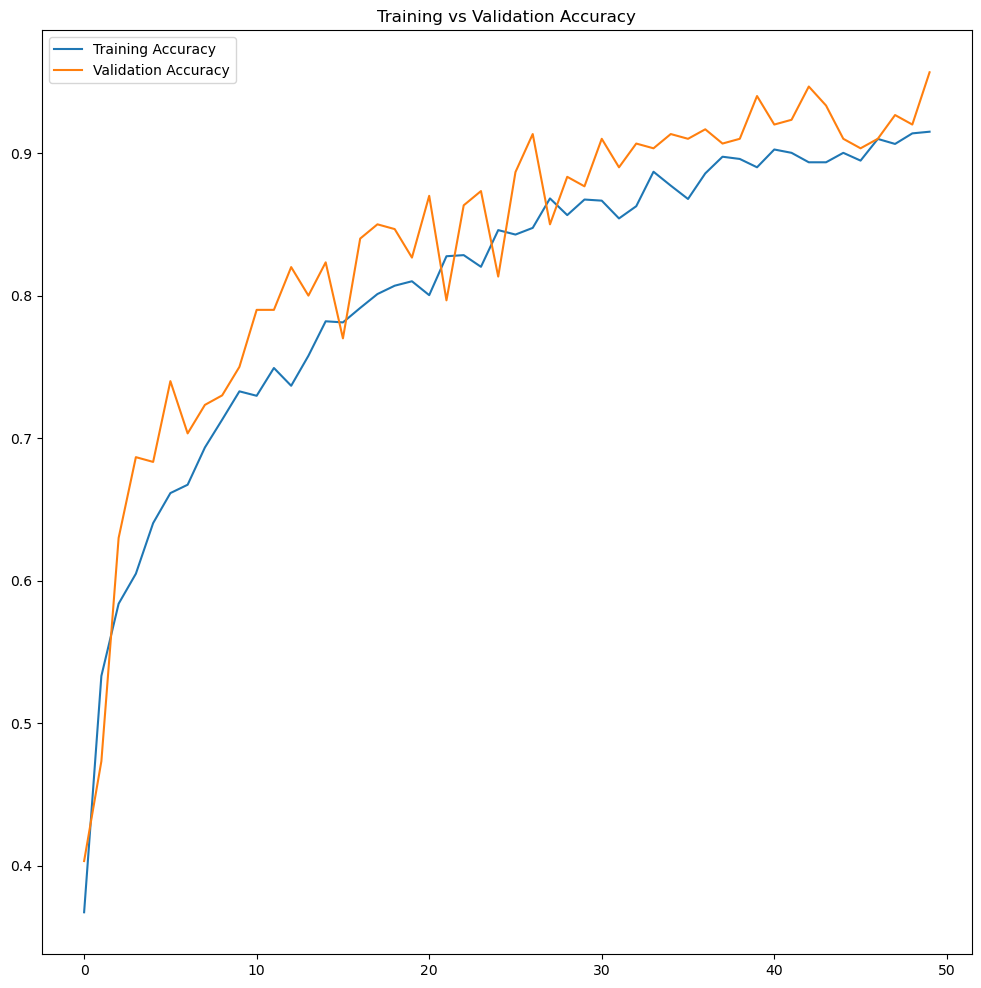

In [28]:
plt.figure(figsize = (12, 12))
plt.plot(range(50), acc, label = 'Training Accuracy')
plt.plot(range(50), val_acc, label = 'Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

Text(0.5, 1.0, 'Training vs Validation loss')

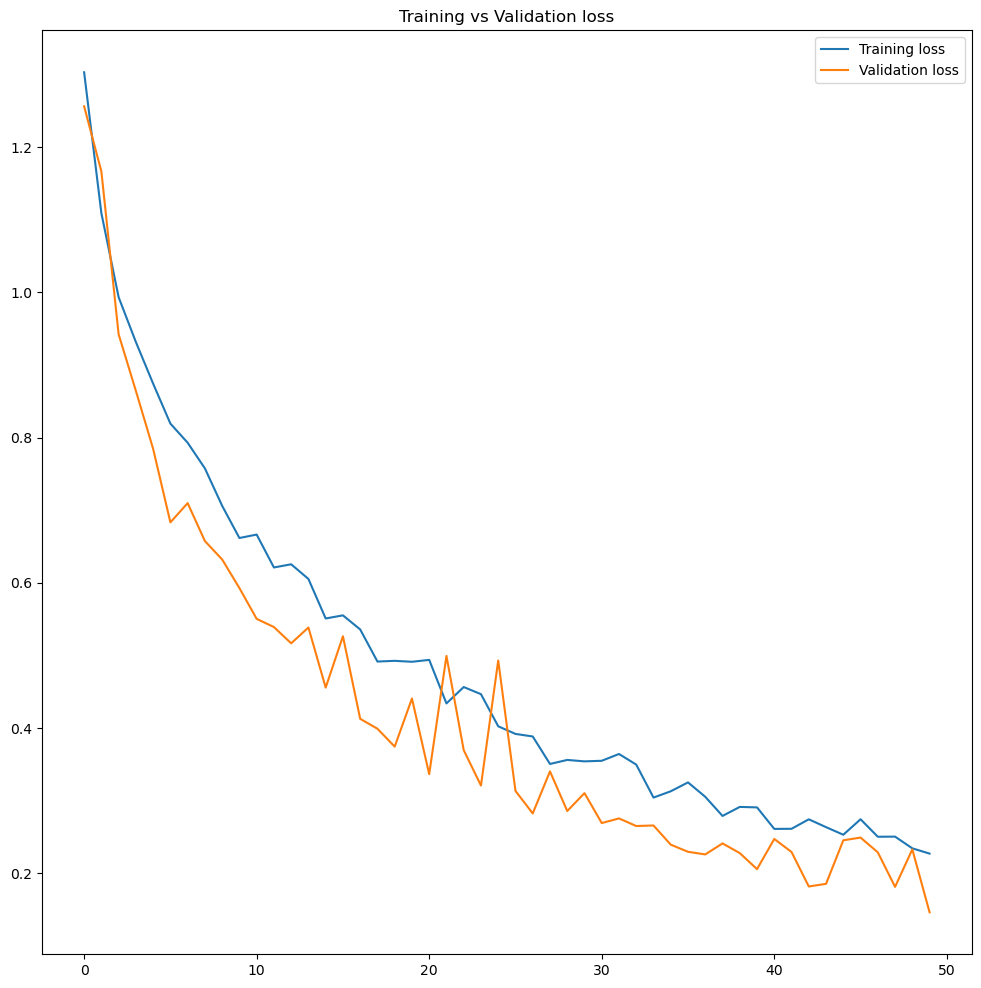

In [29]:
plt.figure(figsize = (12, 12))
plt.plot(range(50), loss, label = 'Training loss')
plt.plot(range(50), val_loss, label = 'Validation loss')
plt.legend()
plt.title('Training vs Validation loss')

First image to prediction : 
Actual label of first input :
category1_tumor

1/1 [==============================] - 0s 318ms/step
Predicted Category : 
category1_tumor


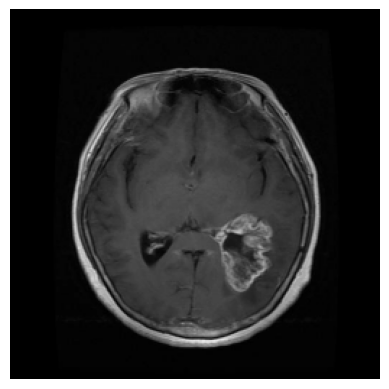

In [49]:
for i, j in test_df.take(1):
    
    first_input = i[0].numpy().astype('uint8')
    first_input_label = j[0]
    
    print("First image to prediction : ")
    plt.imshow(first_input)
    plt.axis("off")
    print("Actual label of first input :")
    print(df_classes[first_input_label])
    
    print()
    
    prediction = model.predict(i)
    print("Predicted Category : ")
    print(df_classes[np.argmax(prediction[0])])

In [50]:
model.save('../App/model.h5')